# Multiple Linear Regression


In this Notebook I'm gonna estimate the profit of a Venture Capital Firm and try to decide in which companies the firm should invest on using linear regression algorithms.

Let's consider the variable R&D and find out which companies to invest in.


Import the libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Importing the dataset 

In [51]:
companies = pd.read_csv('1000_Companies.txt')


First 5 rows of the dataframe

In [52]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Check the columns name and type

In [53]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


The numerical predictors are of the type float and the categorical ones are of the type object, as expected.

Now let's check the number of rows and columns

In [54]:
companies.shape

(1000, 5)

We can conclude based  on the info() method output that we don't have any null entries, so we don't need to deal with them. 

Correlation Matrix

<AxesSubplot:>

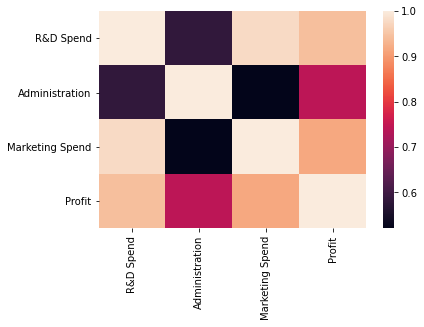

In [55]:
sns.heatmap(companies.corr())

We can see that every predictor has a degree of correlation with the target variable Profit. Furthermore there are predictors that are innerently correlated, namely R&D and Marketing. Let's plot this variables.

(0.0, 495373.305)

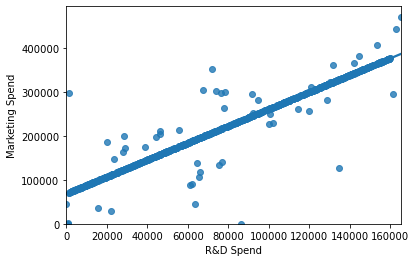

In [90]:
sns.regplot(x = 'R&D Spend', y = 'Marketing Spend', data = companies)
plt.ylim(0,)

We can clearly see this correlation from the graph above

Let's plot some predictors that are not strongly correlated. Like R&D and Administrator.

(0.0, 335170.59)

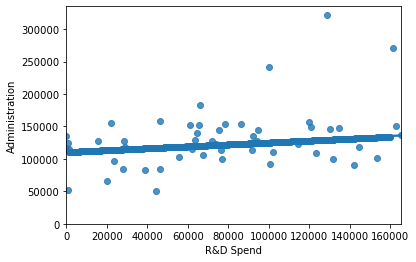

In [91]:
sns.regplot(x = 'R&D Spend', y = 'Administration', data = companies)
plt.ylim(0,)

As expected, this two predictors are not correlated.

Now let's create a grid of plots regarding the correlation between all the numerical columns in the dataframe and the profit. 

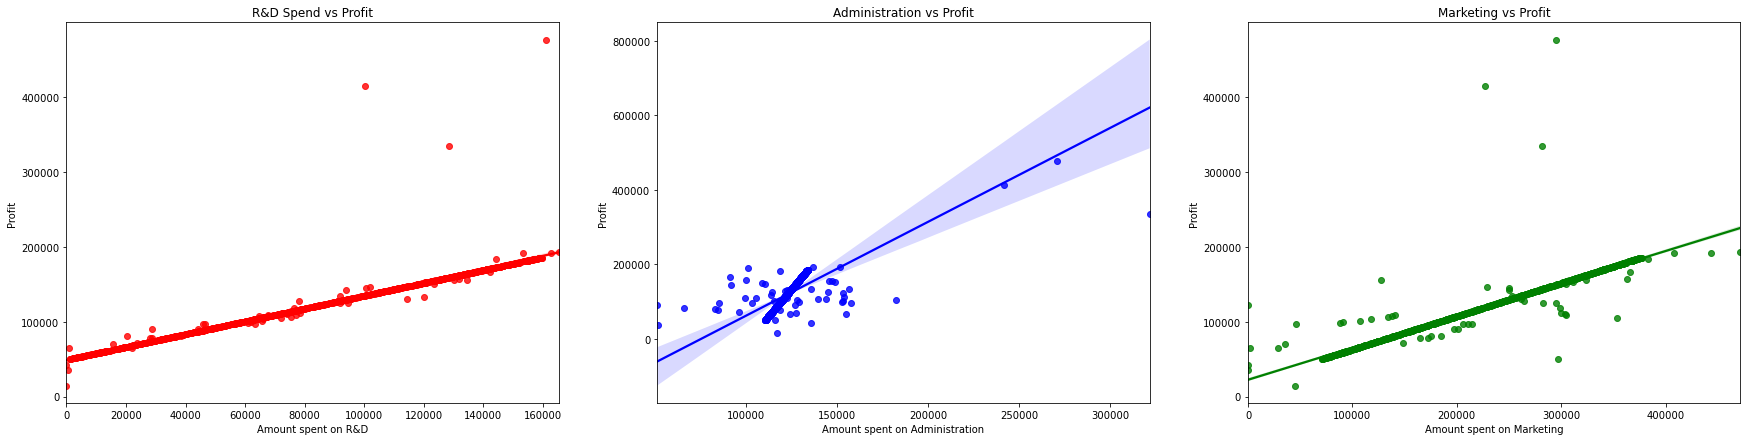

In [105]:
fig = plt.figure(figsize = (30,7)) 

#R&D Spend vs Profit
ax0 = fig.add_subplot(1,3,1)
#Administration vs Profit
ax1 = fig.add_subplot(1,3,2)
#Marketing Spend vs Profit
ax2 = fig.add_subplot(1,3,3)

#Subplot 1
sns.regplot(x = 'R&D Spend', y = 'Profit', data = companies, color = 'red', ax = ax0)
ax0.set_title('R&D Spend vs Profit')
ax0.set_xlabel('Amount spent on R&D')
ax0.set_ylabel('Profit')

#Subplot 2
sns.regplot(x = 'Administration', y = 'Profit', data = companies, color = 'blue', ax = ax1)
ax1.set_title('Administration vs Profit')
ax1.set_xlabel('Amount spent on Administration')
ax1.set_ylabel('Profit')

#Subplot 3
sns.regplot(x = 'Marketing Spend', y = 'Profit', data = companies, color = 'green', ax = ax2)
ax2.set_title('Marketing vs Profit')
ax2.set_xlabel('Amount spent on Marketing')
ax2.set_ylabel('Profit')

plt.show()



Encoding categorical data

In [61]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
companies['State'] = labelencoder.fit_transform(companies['State'])
companies.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [57]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   int32  
 4   Profit           1000 non-null   float64
dtypes: float64(4), int32(1)
memory usage: 35.3 KB


Now the predictor state is of the type int.

Define the predictors and target values

In [60]:
#Predictors values
X = data.iloc[:,:-1].values
print(X[0:5,:])
print(type(X))
#Target values
y = companies.iloc[:, 4].values


[[1.6534920e+05 1.3689780e+05 4.7178410e+05 2.0000000e+00]
 [1.6259770e+05 1.5137759e+05 4.4389853e+05 0.0000000e+00]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 1.0000000e+00]
 [1.4437241e+05 1.1867185e+05 3.8319962e+05 2.0000000e+00]
 [1.4210734e+05 9.1391770e+04 3.6616842e+05 1.0000000e+00]]
<class 'numpy.ndarray'>


Now we can start creating the regression model. We start by splitting the data into training and test sets.

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

Let's check the size of the variables

In [64]:
print('Size of the X variable -> ', X.shape)
print('Size of the X_train variable -> ', X_train.shape)
print('Size of the X_test variable -> ', X_test.shape)

Size of the X variable ->  (1000, 4)
Size of the X_train variable ->  (800, 4)
Size of the X_test variable ->  (200, 4)


The train/test split was done accordingly since we defined a training sample equals to 80% of the global sample.

Fitting Multiple Linear Regression to the training set

In [68]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#Fitting the model
regressor.fit(X_train, y_train)

LinearRegression()

Predicting the test set results

In [69]:
y_pred = regressor.predict(X_test)


Let's take a look at the coefficients and interception of the linear regression

In [70]:
print('The coefficients are: ', regressor.coef_)
print('The interception point is: ', regressor.intercept_)

The coefficients are:  [ 5.27572958e-01  8.44490415e-01  1.06639226e-01 -3.54869857e+02]
The interception point is:  -51144.726425721776


Now let's evaluate the model using the test R-squared indicator

In [73]:
from sklearn.metrics import r2_score
print('R-squared: ',r2_score(y_test, y_pred))

R-squared:  0.9112595959622045


Since the R-squared obtained is pretty close to 1 we can conclude that our model is pretty accurate predicting out of sample profits.

We expect the train R-squared to be higher, let's check that

In [74]:
regressor.score(X_train, y_train)

0.9585144493889786

Indeed it is.

Distribution plot of the test sample

C:\Users\35191\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\35191\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


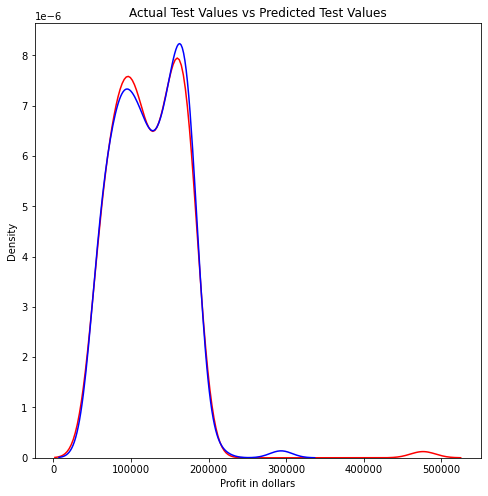

In [96]:
plt.figure(figsize=(8, 8))

ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'Actual test value')
sns.distplot(y_pred, hist = False, color = 'b', label = 'Predicted Test Values',ax = ax1)
plt.title('Actual Test Values vs Predicted Test Values')
plt.xlabel('Profit in dollars')

plt.show()

We stated that R&D and Marketing where heavily correlated previously

In [76]:
companies[['R&D Spend','Marketing Spend']].corr()

,R&D Spend,Marketing Spend
R&D Spend,1.000000,0.978407
Marketing Spend,0.978407,1.000000


So let's create a model without R&D and without Marketing to check the variance in the R-squared and check if one of them is not statisticaly significant.

In [77]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [83]:
#Predictors values without Marketing
X_RD = companies.iloc[:,[0,1,3]].values
print(X_RD[0:5,:])
#Predictors values without R&D
X_Mark = companies.iloc[:,1:4].values
print(X_Mark[0:5,:])



[[1.6534920e+05 1.3689780e+05 2.0000000e+00]
 [1.6259770e+05 1.5137759e+05 0.0000000e+00]
 [1.5344151e+05 1.0114555e+05 1.0000000e+00]
 [1.4437241e+05 1.1867185e+05 2.0000000e+00]
 [1.4210734e+05 9.1391770e+04 1.0000000e+00]]
[[1.3689780e+05 4.7178410e+05 2.0000000e+00]
 [1.5137759e+05 4.4389853e+05 0.0000000e+00]
 [1.0114555e+05 4.0793454e+05 1.0000000e+00]
 [1.1867185e+05 3.8319962e+05 2.0000000e+00]
 [9.1391770e+04 3.6616842e+05 1.0000000e+00]]


Now let's create the two different regression models

In [88]:
#For the case with all the variables
regressor_all = LinearRegression()
regressor_all.fit(X,y)

#For the case without the Marketing
regressor_RD = LinearRegression()
regressor_RD.fit(X_RD, y)

#For the case without the R&D
regressor_Mark = LinearRegression()
regressor_Mark.fit(X_Mark, y)

LinearRegression()

Now let's compare the R-squared for both of them

In [89]:
print('R-squared for the case with all the variables: ',regressor_all.score(X, y))
print('R-squared for the case without Marketing: ',regressor_RD.score(X_RD, y))
print('R-squared for the case without R&D: ', regressor_Mark.score(X_Mark, y))

R-squared for the case with all the variables:  0.9498644471232138
R-squared for the case without Marketing:  0.9487089391021684
R-squared for the case without R&D:  0.937089274285302


The accuracy of the model using all the observations doesn't suffer a lot in terms of accuracy if we don't include Marketing, since the values of the R-squared are almost identical. So, we have an indication that the variable Marketing Spend is not statistically significant.